In [1]:
import os
from dotenv import load_dotenv
from datetime import datetime

load_dotenv()

os.environ["GOOGLE_API_KEY"] = os.getenv("GEMINI_API_KEY")

from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

print(llm.invoke("What is AI?").content)

/Users/ips/Documents/trail/AI Agents/aiagent/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AI, or Artificial Intelligence, is a broad field of computer science that aims to create machines capable of performing tasks that typically require human intelligence. This includes things like:

*   **Learning:** Acquiring information and rules for using the information.
*   **Reasoning:** Using rules to reach conclusions (either definite or probabilistic).
*   **Problem-solving:** Finding solutions to complex situations.
*   **Perception:** Understanding and interpreting sensory input (like images, sound, or text).
*   **Understanding natural language:** Processing and responding to human language.

Here's a more detailed breakdown:

**Key Concepts:**

*   **Algorithms:**  AI relies heavily on algorithms, which are sets of instructions that tell a computer how to perform a task.
*   **Data:** AI systems often learn from large amounts of data.  The more data, the better the AI can often perform.
*   **Machine Learning (ML):**  A subset of AI that focuses on enabling systems to learn 

In [3]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
messages = [AIMessage(f"So you like AI?", name="Bot")]
messages.append(HumanMessage(f"Yes I love AI , but how to learn more about it,please give me a roadmap?", name="Test"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you like AI?
================================ Human Message =================================
Name: Test

Yes I love AI , but how to learn more about it,please give me a roadmap?


In [4]:
response = llm.invoke(messages)
pprint(response.content)

("Okay, great! Loving AI is a fantastic starting point. Here's a roadmap to "
 'guide you through learning more about AI, broken down into stages with '
 'resources and potential paths to follow:\n'
 '\n'
 '**Phase 1: Foundational Understanding (The Big Picture)**\n'
 '\n'
 'This phase is about building a solid base understanding of what AI is, its '
 "different types, and its applications.  You don't need to dive deep into the "
 'math just yet.\n'
 '\n'
 '*   **Goals:**\n'
 '    *   Understand the core concepts of AI, Machine Learning, and Deep '
 'Learning.\n'
 '    *   Learn about different types of AI (e.g., supervised, unsupervised, '
 'reinforcement learning).\n'
 '    *   Explore the applications of AI in various industries.\n'
 '    *   Become familiar with key terminology.\n'
 '    *   Start thinking critically about the ethical implications of AI.\n'
 '\n'
 '*   **Resources:**\n'
 '\n'
 '    *   **Online Courses (Non-Technical):**\n'
 '        *   **Elements of AI (Universit

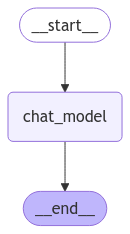

In [5]:
from IPython.display import Image, display
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph, START, END

# Nodes are units of work that can be executed in a graph(python functions)

# Always start by defining a state
def chat_model_node(state: MessagesState):
    return {"messages": llm.invoke(state["messages"])}


# Edge is a connection between nodes
# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [6]:
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you like AI?
================================ Human Message =================================
Name: Test

Yes I love AI , but how to learn more about it,please give me a roadmap?
================================== Ai Message ==================================

Okay, that's fantastic! Loving AI is a great starting point. Here's a roadmap to learn more about AI, broken down into stages, with resources and considerations at each step.  I'll try to make it comprehensive, but remember you can tailor it to your specific interests within AI.

**Phase 1: Foundational Knowledge (The "Why" and the "What")**

*   **Goal:** Understand the core concepts, history, and impact of AI.  No coding required at this stage.

*   **Topics:**
    *   **What is AI?** Definitions, goals, and different types of AI (Narrow/Weak, General/Strong, Superintelligence).
    *   **History of AI:** Key figures, breakthroughs, a

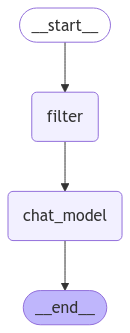

In [7]:
# Filtering the messages

from langchain_core.messages import RemoveMessage

# Nodes
def filter_messages(state: MessagesState):
    # Delete all but the 2 most recent messages
    #This function takes the current state of messages and creates a list of RemoveMessage objects for all messages except the last two.

    delete_messages = [RemoveMessage(id=m.id) for m in state["messages"][:-2]]
    return {"messages": delete_messages}

def chat_model_node(state: MessagesState):    
    return {"messages": [llm.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("filter", filter_messages)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "filter")
builder.add_edge("filter", "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
# Message list with a preamble
messages = [AIMessage("Hi.", name="Bot", id="1")]
messages.append(HumanMessage("Hi.", name="Lance", id="2"))
messages.append(AIMessage("So you said you were researching about AI?", name="Bot", id="3"))
messages.append(HumanMessage("Yes, I know about AI. But what other topics should I learn about?", name="Lance", id="4"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

So you said you were researching about AI?
================================ Human Message =================================
Name: Lance

Yes, I know about AI. But what other topics should I learn about?
================================== Ai Message ==================================

That's a great question! It depends a lot on your interests and goals, but here's a breakdown of topics that are often relevant and valuable to learn about, depending on what aspects of AI you're most interested in:

**1. Foundational Knowledge:**

*   **Mathematics:**
    *   **Linear Algebra:** Essential for understanding machine learning algorithms and data representation. Topics like vectors, matrices, and transformations are fundamental.
    *   **Calculus:** Understanding derivatives and optimization techniques used in training models.
    *   **Probability and Statistics:** Crucial for understanding data dist

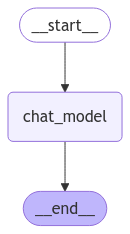

In [9]:
# Trimming the messages
# Trimming happens at tokens level

from langchain_core.messages import trim_messages

# Node
def chat_model_node(state: MessagesState):
    messages = trim_messages(
            state["messages"],
            max_tokens=100,
            strategy="last",
            token_counter=llm,
            allow_partial=False,
        )
    return {"messages": [llm.invoke(messages)]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("chat_model", chat_model_node)
builder.add_edge(START, "chat_model")
builder.add_edge("chat_model", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
messages.append(output['messages'][-1])
messages.append(HumanMessage(f"Tell me where Orcas live!", name="Lance"))

# Invoke
output = graph.invoke({'messages': messages})
for m in output['messages']:
    m.pretty_print()

================================== Ai Message ==================================
Name: Bot

Hi.
================================ Human Message =================================
Name: Lance

Hi.
================================== Ai Message ==================================
Name: Bot

So you said you were researching about AI?
================================ Human Message =================================
Name: Lance

Yes, I know about AI. But what other topics should I learn about?
================================== Ai Message ==================================

That's a great question! It depends a lot on your interests and goals, but here's a breakdown of topics that are often relevant and valuable to learn about, depending on what aspects of AI you're most interested in:

**1. Foundational Knowledge:**

*   **Mathematics:**
    *   **Linear Algebra:** Essential for understanding machine learning algorithms and data representation. Topics like vectors, matrices, and transformations

In [11]:
list_of_messages=[
    ("user", "Hi, I'm Aditya"),
    ("bot", "Hi Aditya, I'm a chatbot. How can I help you today?"),
    ("user", "I'm looking for a job. Can you help me find one?"),
    ("bot", "Sure, I can help you with that. What kind of job are you looking for?"),
    ("user", "I'm looking for a job in the tech industry."),
    ("bot", "Great! What kind of tech industry are you interested in?"),
    ("user", "I'm interested in the AI industry."),
    ("bot", "Awesome! What kind of AI are you interested in?"),
    ("user", "I'm interested in AI agents."),
    ("bot", "That's great! What kind of AI agents are you interested in?"),
]

In [12]:
for i in list_of_messages:
    print(i)

('user', "Hi, I'm Aditya")
('bot', "Hi Aditya, I'm a chatbot. How can I help you today?")
('user', "I'm looking for a job. Can you help me find one?")
('bot', 'Sure, I can help you with that. What kind of job are you looking for?')
('user', "I'm looking for a job in the tech industry.")
('bot', 'Great! What kind of tech industry are you interested in?')
('user', "I'm interested in the AI industry.")
('bot', 'Awesome! What kind of AI are you interested in?')
('user', "I'm interested in AI agents.")
('bot', "That's great! What kind of AI agents are you interested in?")


In [13]:
list_of_messages [-3:]

[('bot', 'Awesome! What kind of AI are you interested in?'),
 ('user', "I'm interested in AI agents."),
 ('bot', "That's great! What kind of AI agents are you interested in?")]